In [1]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("svhn_coco_combined_train", {}, "./coco_format/svhn_coco_train_combined.json", "./coco_format/train/")
register_coco_instances("svhn_coco_combined_val", {}, "j./coco_format/svhn_coco_val_combined.json", "./coco_format/val")

In [2]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
import os

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("svhn_dataset_train",)
cfg.DATASETS.TEST = ("svhn_dataset_val")
cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_1x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 5000    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10

In [4]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

{'instances': Instances(num_instances=2, image_height=49, image_width=100, fields=[pred_boxes: Boxes(tensor([[51.6959,  3.7460, 63.5988, 41.2600],
         [33.9069,  4.0188, 50.5397, 40.4659]], device='cuda:0')), scores: tensor([0.9301, 0.9216], device='cuda:0'), pred_classes: tensor([1, 7], device='cuda:0')])}

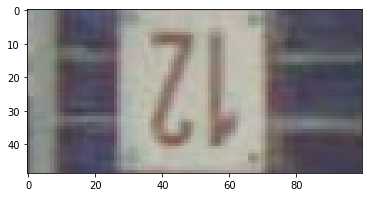

In [11]:
from glob import glob as glob
import random
from matplotlib import pyplot as plt
import cv2

test_imgs = glob('../testsvhn/*')
test_img= cv2.imread(test_imgs[random.randint(0,len(test_imgs))])
plt.show()
plt.imshow(test_img)
predictor(test_img)

In [26]:
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
svhn_coco_combined_val_metadata = MetadataCatalog.get("svhn_coco_combined_val")

for index in range(0,len(test_imgs)):
    im = cv2.imread(test_imgs[index])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=svhn_coco_combined_val_metadata, 
                   scale=0.8
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2.imwrite('./output/pred/'+str(index)+'.png',v.get_image()[:, :, ::-1])

In [18]:
outputs

{'instances': Instances(num_instances=1, image_height=70, image_width=146, fields=[pred_boxes: Boxes(tensor([[69.2649, 19.2339, 87.7334, 52.2867]], device='cuda:0')), scores: tensor([0.9206], device='cuda:0'), pred_classes: tensor([9], device='cuda:0')])}